<a href="https://colab.research.google.com/github/hannahweber244/AIPortfolio/blob/main/Lernziel4_Abgabe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Daten herunterladen und unzippen
!gdown --id 1mlZiLRfBEcAF9dahOlWl2bofXOexSyRF 
!unzip pixelchars.zip

Downloading...
From: https://drive.google.com/uc?id=1mlZiLRfBEcAF9dahOlWl2bofXOexSyRF
To: /content/pixelchars.zip
7.40MB [00:00, 117MB/s]
Archive:  pixelchars.zip
replace 0/0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [1]:
## Git Repo clonen
import os
# entfernen einer Git Version, falls schon einmal in Laufzeit geladen
if os.path.exists('AIPortfolio'):
    ! rm -rf 'AIPortfolio'
!git clone https://github.com/hannahweber244/AIPortfolio.git

Cloning into 'AIPortfolio'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 195 (delta 90), reused 137 (delta 49), pack-reused 0
Receiving objects: 100% (195/195), 34.01 MiB | 10.01 MiB/s, done.
Resolving deltas: 100% (90/90), done.


In [15]:
## PyTorch Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
import torch.optim as optim

from torchsummary import summary

#random und numpy
import random 
import numpy as np

## aktuelles device auslesen --> alle modelle werden automatisch auf dieses device geladen
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# random seed für alle relevanten packages setzen, um ergebnisse reproduzierbar zu machen
s = 0
random.seed(s)
torch.manual_seed(s)
np.random.seed(s)

#google colab interne funktion um bilder anzuzeigen
from google.colab.patches import cv2_imshow

#pandas importieren
import pandas as pd

#import der eigenen funktionen und klassen von github
from AIPortfolio.VAEs.VAEs import *
from AIPortfolio.VAEs.VAE_Trainer import *
from AIPortfolio.VAEs.linearVAE import linearVAE
from AIPortfolio.module import VAE_

In [16]:
# generelle Parameter definieren
path = ['2/']#'1/', '2/', '3/']#bilder aus allen ordnern nehmen --> kann variable angepasst werden
train_epochs = 200
lr = 0.0001

## Informationen zu Modellen:

VAE_XConv Modelle haben einen latenten Raum der Größe 24 und variieren in der Anzahl Convolutions / Transconvolutions, die verwendet werden. Insgesamt gibt es 3 dieser Modelle 

VAE_ nutzt auch BatchNormalisierungslayer und ist generell etwas ausgefallener als die 3 VAE_XCOnv Modelle, hat einen latenten Raum der Größe 30

linearVAE nutz wie der Name schon sagt nur fully connected Layer als Encoder und Decoder. Auch hier ist der latente Raum 30 groß



### Untersuchung: BCEWithLogitsLoss

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 31, 31]             588
              ReLU-2           [-1, 12, 31, 31]               0
            Linear-3                   [-1, 48]         553,584
            Linear-4                   [-1, 24]           1,176
            Linear-5                   [-1, 24]           1,176
            Linear-6                [-1, 11532]         288,300
   ConvTranspose2d-7            [-1, 3, 64, 64]             579
Total params: 845,403
Trainable params: 845,403
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.36
Params size (MB): 3.22
Estimated Total Size (MB): 3.63
----------------------------------------------------------------
None


/content/AIPortfolio/VAEs/VAE_Trainer.py:119: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if augmented != '':

  1%|          | 2/200 [00:00<00:15, 12.89it/s]

VAE_1Conv(
  (encoder): Sequential(
    (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
  )
  (encode): Linear(in_features=11532, out_features=48, bias=True)
  (decode): Linear(in_features=24, out_features=11532, bias=True)
  (decode_conv): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2))
  (mean): Linear(in_features=48, out_features=24, bias=True)
  (var): Linear(in_features=48, out_features=24, bias=True)
)



100%|██████████| 200/200 [00:15<00:00, 12.74it/s]

epoche: 0
original


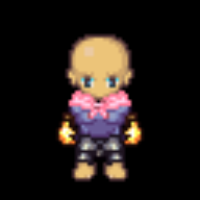

reconstructed


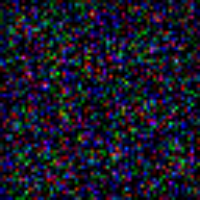

epoche: 100
original


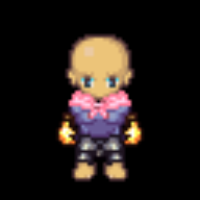

reconstructed


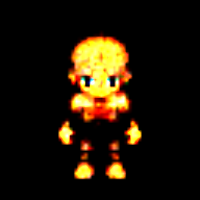

epoche: 199
original


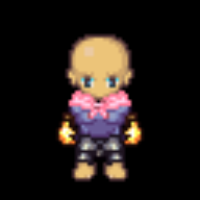

reconstructed


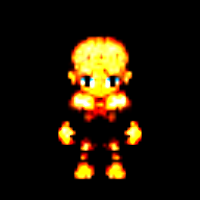

latent vector: tensor([[ 1.1763, -0.2570,  0.9654,  0.7987, -0.4992,  1.0882,  1.7185,  0.3614,
          0.3108, -0.8485,  0.3531, -1.7959, -1.6398, -0.5487, -0.4419,  0.0500,
         -1.1799, -1.5224,  1.6054, -1.5139,  0.4971, -2.0864,  0.6526,  0.8848]],
       device='cuda:0')
latent vector: tensor([[ 0.5381,  0.5044,  0.0513,  0.8003, -1.5279,  0.5473,  0.8855, -0.6813,
         -0.1464,  0.4517,  2.1115,  0.2983, -1.7779, -0.8941, -0.3410, -2.0257,
         -0.0517,  0.1621, -0.3164,  0.3294,  0.0172,  1.1352, -0.8000, -0.1546]],
       device='cuda:0')


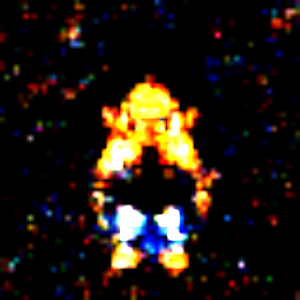

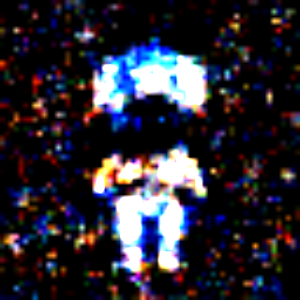

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")




 =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 31, 31]             588
              ReLU-2           [-1, 12, 31, 31]               0
            Linear-3                   [-1, 48]         553,584
            Linear-4                   [-1, 24]           1,176
            Linear-5                   [-1, 24]           1,176
            Linear-6                [-1, 11532]         288,300
   ConvTranspose2d-7            [-1, 3, 64, 64]             579
Total params: 845,403
Trainable params: 845,403
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.36
Params size (MB): 3.22
Estimated Total Size (MB): 3.63
----------------------------------------------------------------
None



  1%|          | 2/200 [00:00<00:15, 13.15it/s]

VAE_1Conv(
  (encoder): Sequential(
    (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
  )
  (encode): Linear(in_features=11532, out_features=48, bias=True)
  (decode): Linear(in_features=24, out_features=11532, bias=True)
  (decode_conv): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2))
  (mean): Linear(in_features=48, out_features=24, bias=True)
  (var): Linear(in_features=48, out_features=24, bias=True)
)



100%|██████████| 200/200 [00:15<00:00, 12.94it/s]

epoche: 0
original


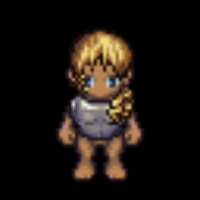

reconstructed


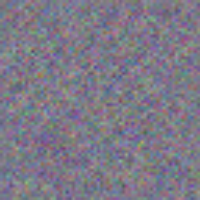

epoche: 100
original


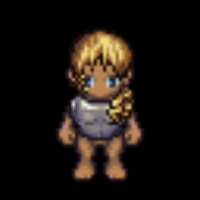

reconstructed


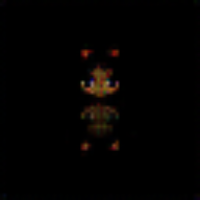

epoche: 199
original


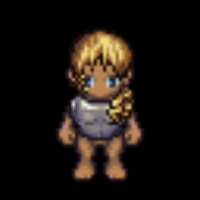

reconstructed


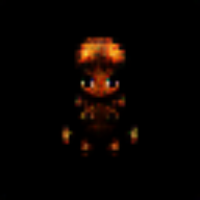

latent vector: tensor([[-1.4092,  1.7245,  0.5863,  0.7381,  1.3821, -0.3591,  0.1995, -0.3143,
          0.2630,  0.1306, -0.6937,  1.0761,  0.3968, -0.7531, -1.0346, -0.6462,
          0.9397, -0.3627, -0.9608,  0.7978, -2.0381,  0.6081, -1.4667, -0.3174]],
       device='cuda:0')
latent vector: tensor([[-0.0765,  0.0089,  1.0709, -2.1938,  0.5622,  0.7416,  0.3118, -1.1476,
         -0.0563,  1.3540,  1.0726,  0.6152, -0.7270,  0.3099, -0.3212,  0.6952,
         -0.7212, -1.2684, -0.6678,  0.8994, -0.9447, -1.5018, -1.1942,  0.1104]],
       device='cuda:0')


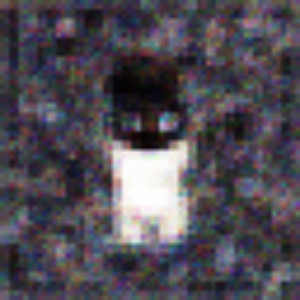

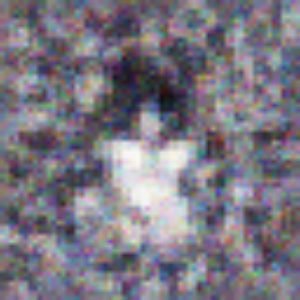

In [17]:
## Untersuchen des Modells mit einem Conv und BCEwithLogitsLoss
model = VAE_1Conv().to(device)

#modell summary printen
print(summary(model, input_size=(3,64,64)))

#pipeline aufrufen und die parameter 
# path = entweder ein string = nur ein ordner oder eine liste von strings = mehrere ordner wo bilder drin liegen
# lernrate 
# anzahl trainingsepochen
# loss function (entweder BCE --> BCEWithLogits oder MSE ---> MSE Loss)
# pretrained (ja nein wert, ob modell von einem checkpoint weitergeladen werden soll)
# use augmentation --> sollen eingelsene bilder noch augmentiert werden?
VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'BCE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

#iterieren über dictionary aus VAE Klasse, 
# dict enthält das "richtige" Bild und das zugehörige rekonstruierte Bild aus dem Training --> sehen wie gut rekonstruiert wird
for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:#immer nur alle 100 epochen anzeigen
        continue
    print('epoche:', epoche)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break
## funktion aufrufen, die neue images generieren kann
generated_images = VAE.generate_random_images(2, emb_size = 24, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

print('\n')
print(65*'=')
print(15*' = ')
print(65*'=')
print('\n')

# gleiches modell nochmal, nur diesmal ist eine sigmoid funktion aktivierungsfunktion auf letztem layer
model = VAE_1Conv(sigmoid=True).to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'BCE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    #random.shuffle(tup_list)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 24, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 31, 31]             588
              ReLU-2           [-1, 12, 31, 31]               0
            Conv2d-3           [-1, 48, 15, 15]           5,232
              ReLU-4           [-1, 48, 15, 15]               0
            Linear-5                   [-1, 48]         518,448
            Linear-6                   [-1, 24]           1,176
            Linear-7                   [-1, 24]           1,176
            Linear-8                [-1, 10800]         270,000
   ConvTranspose2d-9           [-1, 12, 31, 31]           5,196
             ReLU-10           [-1, 12, 31, 31]               0
  ConvTranspose2d-11            [-1, 3, 64, 64]             579
Total params: 802,395
Trainable params: 802,395
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/

/content/AIPortfolio/VAEs/VAE_Trainer.py:119: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if augmented != '':

  1%|          | 2/200 [00:00<00:18, 10.81it/s]

VAE_2Conv(
  (encoder): Sequential(
    (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(12, 48, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
  )
  (encode): Linear(in_features=10800, out_features=48, bias=True)
  (decode): Linear(in_features=24, out_features=10800, bias=True)
  (decode_conv): Sequential(
    (0): ConvTranspose2d(48, 12, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2))
  )
  (mean): Linear(in_features=48, out_features=24, bias=True)
  (var): Linear(in_features=48, out_features=24, bias=True)
)



100%|██████████| 200/200 [00:18<00:00, 10.77it/s]

epoche: 0
original


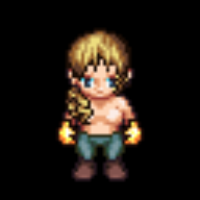

reconstructed


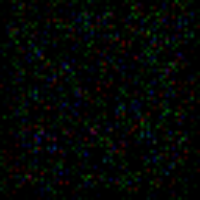

epoche: 100
original


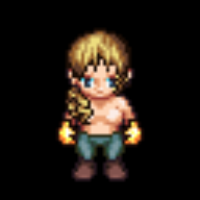

reconstructed


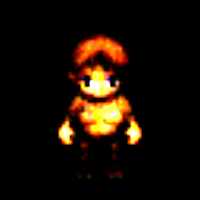

epoche: 199
original


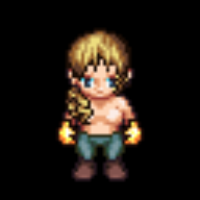

reconstructed


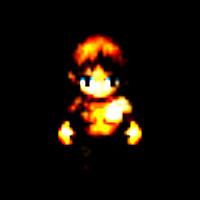

latent vector: tensor([[-1.2924, -0.7132, -0.9862,  0.5051, -1.0177, -0.7647,  0.1069, -0.5801,
          2.1897,  0.4699,  1.3166,  0.1037,  1.4338, -0.2175, -0.8627,  1.2854,
         -0.2505, -0.2372,  1.2542, -1.0148,  0.3646, -0.9434,  1.2019,  1.4819]],
       device='cuda:0')
latent vector: tensor([[ 1.4935, -0.5284,  1.1790, -0.3616, -0.5366,  0.4036, -1.2960, -0.0203,
          1.7962, -1.4913, -0.1843, -0.3127,  0.2911,  0.0863, -0.0726, -1.6528,
         -0.6519, -1.1003,  0.4908, -1.1041,  1.8008,  1.4078, -0.0229,  0.3299]],
       device='cuda:0')


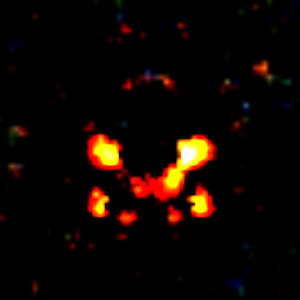

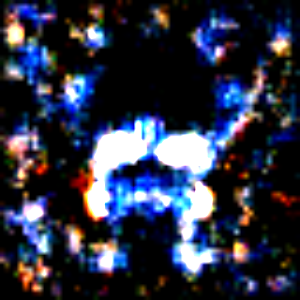

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")




 =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 31, 31]             588
              ReLU-2           [-1, 12, 31, 31]               0
            Conv2d-3           [-1, 48, 15, 15]           5,232
              ReLU-4           [-1, 48, 15, 15]               0
            Linear-5                   [-1, 48]         518,448
            Linear-6                   [-1, 24]           1,176
            Linear-7                   [-1, 24]           1,176
            Linear-8                [-1, 10800]         270,000
   ConvTranspose2d-9           [-1, 12, 31, 31]           5,196
             ReLU-10           [-1, 12, 31, 31]               0
  ConvTranspose2d-11            [-1, 3, 64, 64]             579
Total params: 802,395
Trainable params: 802,395
Non-trainable params: 0
---------------------------------------------


  1%|          | 2/200 [00:00<00:18, 10.61it/s]

VAE_2Conv(
  (encoder): Sequential(
    (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(12, 48, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
  )
  (encode): Linear(in_features=10800, out_features=48, bias=True)
  (decode): Linear(in_features=24, out_features=10800, bias=True)
  (decode_conv): Sequential(
    (0): ConvTranspose2d(48, 12, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2))
  )
  (mean): Linear(in_features=48, out_features=24, bias=True)
  (var): Linear(in_features=48, out_features=24, bias=True)
)



100%|██████████| 200/200 [00:19<00:00, 10.02it/s]

epoche: 0
original


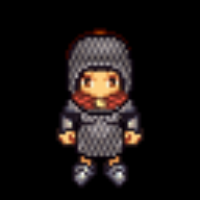

reconstructed


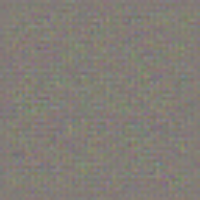

epoche: 100
original


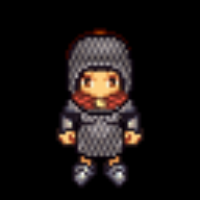

reconstructed


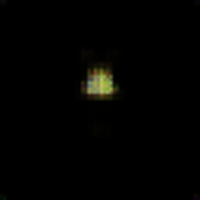

epoche: 199
original


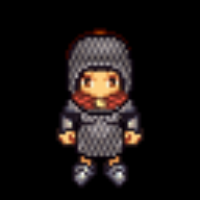

reconstructed


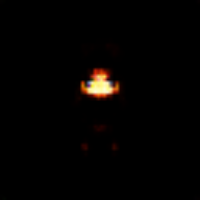

latent vector: tensor([[-0.3966,  1.8282,  1.6971, -0.7953,  0.4308, -1.2524, -1.5921,  0.6960,
         -1.8923,  0.8172,  1.2966,  1.6213, -0.1075,  0.4558,  0.3858,  0.8425,
         -0.3652,  0.8203,  0.5075, -0.7134, -0.7932,  0.0332, -1.0322, -0.5040]],
       device='cuda:0')
latent vector: tensor([[ 3.7113e-01,  1.3607e-01, -7.0048e-01, -1.3345e+00, -4.9183e-01,
          7.5094e-04, -3.0524e-01,  1.3649e+00,  6.4814e-02, -2.1806e-02,
          1.2581e+00,  1.3488e+00,  2.4143e+00, -1.0066e+00, -4.3089e-01,
          4.6222e-01,  5.2903e-01, -1.2611e+00,  2.5941e-01, -4.3135e-01,
         -8.3665e-02,  8.4281e-01,  5.1157e-01, -1.1790e-01]], device='cuda:0')


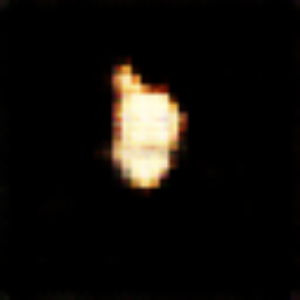

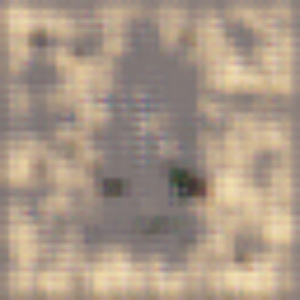

In [18]:
## Untersuchen des Modells mit zwei Conv und BCEwithLogitsLoss
model = VAE_2Conv().to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'BCE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    #random.shuffle(tup_list)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 24, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

print('\n')
print(65*'=')
print(15*' = ')
print(65*'=')
print('\n')

model = VAE_2Conv(sigmoid=True).to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'BCE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    #random.shuffle(tup_list)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 24, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 31, 31]             588
              ReLU-2           [-1, 12, 31, 31]               0
            Conv2d-3           [-1, 48, 15, 15]           5,232
              ReLU-4           [-1, 48, 15, 15]               0
            Conv2d-5           [-1, 64, 13, 13]          27,712
              ReLU-6           [-1, 64, 13, 13]               0
            Linear-7                   [-1, 48]         519,216
            Linear-8                   [-1, 24]           1,176
            Linear-9                   [-1, 24]           1,176
           Linear-10                [-1, 10816]         270,400
  ConvTranspose2d-11           [-1, 48, 15, 15]          27,696
             ReLU-12           [-1, 48, 15, 15]               0
  ConvTranspose2d-13           [-1, 12, 31, 31]           5,196
             ReLU-14           [-1, 12,

/content/AIPortfolio/VAEs/VAE_Trainer.py:119: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if augmented != '':

  0%|          | 1/200 [00:00<00:24,  8.23it/s]

VAE_3Conv(
  (encoder): Sequential(
    (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(12, 48, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (encode): Linear(in_features=10816, out_features=48, bias=True)
  (decode): Linear(in_features=24, out_features=10816, bias=True)
  (decode_conv): Sequential(
    (0): ConvTranspose2d(64, 48, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(48, 12, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2))
  )
  (mean): Linear(in_features=48, out_features=24, bias=True)
  (var): Linear(in_features=48, out_features=24, bias=True)
)



100%|██████████| 200/200 [00:24<00:00,  8.01it/s]

epoche: 0
original


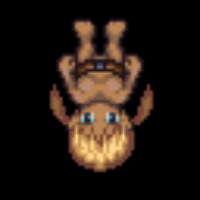

reconstructed


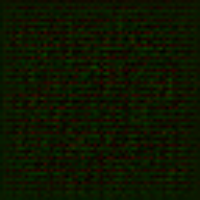

epoche: 100
original


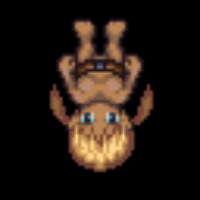

reconstructed


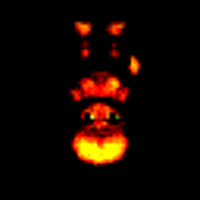

epoche: 199
original


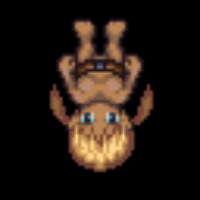

reconstructed


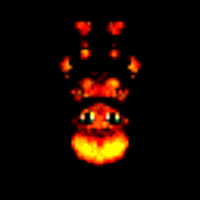

latent vector: tensor([[ 0.7066, -1.4384,  0.1458,  0.0049,  0.3168,  0.7048,  1.4797,  0.0680,
          2.3011,  0.6381, -0.8167, -2.2103,  0.7041,  0.5910,  1.2209, -1.7763,
         -0.9167, -1.1094, -1.4220,  0.8518,  0.7843, -1.0020, -0.5651, -1.4109]],
       device='cuda:0')
latent vector: tensor([[-0.6729, -1.6145, -0.4952, -0.7224, -0.2669,  0.9668, -1.1880,  0.3687,
          0.8255,  1.2049,  1.4322,  0.1663, -0.1271, -0.3541,  0.2127, -0.1627,
         -0.6363,  1.4290, -0.9453, -1.5068,  0.2673,  0.0878,  0.3073,  1.2227]],
       device='cuda:0')


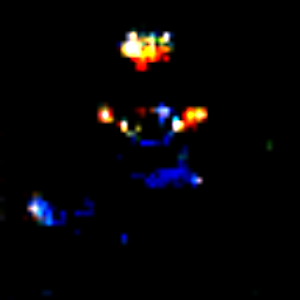

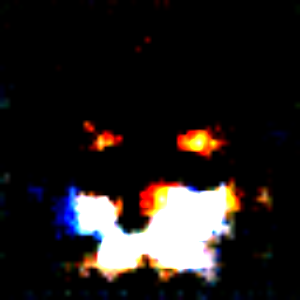

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")




 =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 31, 31]             588
              ReLU-2           [-1, 12, 31, 31]               0
            Conv2d-3           [-1, 48, 15, 15]           5,232
              ReLU-4           [-1, 48, 15, 15]               0
            Conv2d-5           [-1, 64, 13, 13]          27,712
              ReLU-6           [-1, 64, 13, 13]               0
            Linear-7                   [-1, 48]         519,216
            Linear-8                   [-1, 24]           1,176
            Linear-9                   [-1, 24]           1,176
           Linear-10                [-1, 10816]         270,400
  ConvTranspose2d-11           [-1, 48, 15, 15]          27,696
             ReLU-12           [-1, 48, 15, 15]               0
  ConvTranspose2d-13           [-1, 12, 31, 31]      


  0%|          | 1/200 [00:00<00:23,  8.49it/s]

VAE_3Conv(
  (encoder): Sequential(
    (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(12, 48, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (encode): Linear(in_features=10816, out_features=48, bias=True)
  (decode): Linear(in_features=24, out_features=10816, bias=True)
  (decode_conv): Sequential(
    (0): ConvTranspose2d(64, 48, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(48, 12, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2))
  )
  (mean): Linear(in_features=48, out_features=24, bias=True)
  (var): Linear(in_features=48, out_features=24, bias=True)
)



100%|██████████| 200/200 [00:23<00:00,  8.40it/s]

epoche: 0
original


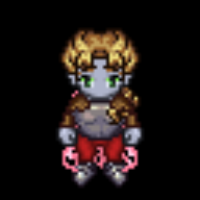

reconstructed


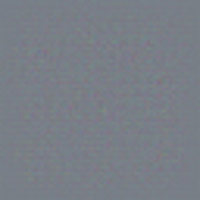

epoche: 100
original


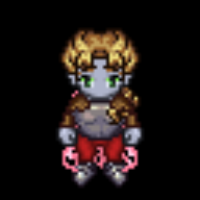

reconstructed


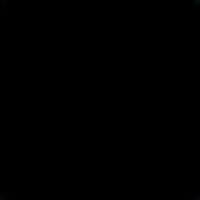

epoche: 199
original


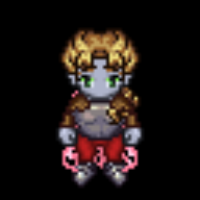

reconstructed


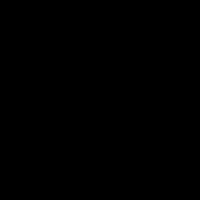

latent vector: tensor([[ 1.0119,  0.0734, -0.8734, -0.8266, -0.8876, -0.3560,  0.3144, -1.3096,
          0.9748,  0.5722, -1.3864,  0.3385,  0.2492, -1.7931, -0.5674, -0.2772,
          0.1547, -2.1657, -2.1458, -0.7121,  2.4705,  0.2262,  0.0586, -0.0384]],
       device='cuda:0')
latent vector: tensor([[ 0.3226, -2.0309, -0.3342,  0.7834, -0.3712,  0.3348, -0.6363,  1.2807,
         -0.3154, -0.3118,  1.4866, -0.5476,  1.3516,  1.7957, -1.1890,  0.8985,
          0.2855, -0.2030, -0.7740,  0.0854,  1.2342,  0.3664,  0.7333, -1.8295]],
       device='cuda:0')


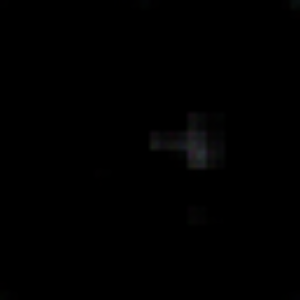

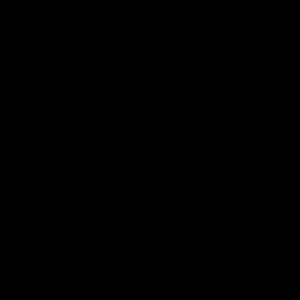

In [19]:
## Untersuchen des Modells mit drei Conv und BCEwithLogitsLoss
model = VAE_3Conv().to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'BCE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    #random.shuffle(tup_list)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 24, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

print('\n')
print(65*'=')
print(15*' = ')
print(65*'=')
print('\n')

model = VAE_3Conv(sigmoid=True).to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'BCE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    #random.shuffle(tup_list)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 24, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 28, 31, 31]           1,372
       BatchNorm2d-2           [-1, 28, 31, 31]              56
            Conv2d-3           [-1, 64, 29, 29]          16,192
            Conv2d-4          [-1, 128, 14, 14]          73,856
       BatchNorm2d-5          [-1, 128, 14, 14]             256
            Conv2d-6          [-1, 256, 12, 12]         295,168
       BatchNorm2d-7          [-1, 256, 12, 12]             512
            Conv2d-8            [-1, 412, 3, 3]       3,797,404
            Linear-9                   [-1, 60]         222,540
           Linear-10                   [-1, 30]           1,830
           Linear-11                   [-1, 30]           1,830
           Linear-12                 [-1, 3708]         114,948
  ConvTranspose2d-13          [-1, 256, 10, 10]       3,797,248
      BatchNorm2d-14          [-1, 256,

/content/AIPortfolio/VAEs/VAE_Trainer.py:119: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if augmented != '':

  0%|          | 0/200 [00:00<?, ?it/s]

VAE_(
  (batch_norm1): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm1_decode): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2_decode): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm3_decode): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout2d(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (cnn1): Conv2d(3, 28, kernel_size=(4, 4), stride=(2, 2))
  (cnn2): Conv2d(28, 64, kernel_size=(3, 3), stride=(1, 1))
  (cnn3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (cnn4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (cnn5): Conv2d(256, 412, kernel_size=(6, 6), stride=(


100%|██████████| 200/200 [05:53<00:00,  1.77s/it]

epoche: 0
original


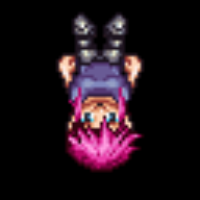

reconstructed


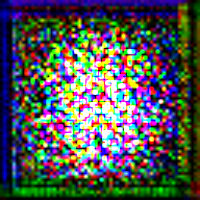

epoche: 100
original


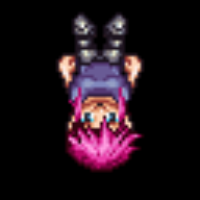

reconstructed


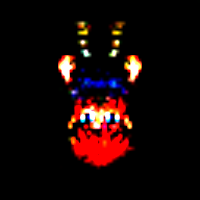

epoche: 199
original


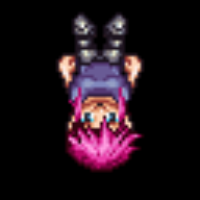

reconstructed


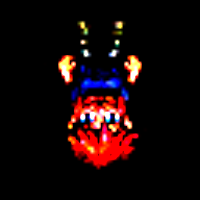

latent vector: tensor([-1.2532, -1.4927,  0.7312,  1.4617, -0.4068,  0.8771, -1.7326, -0.3800,
         1.0343, -1.0503,  0.4486,  0.5518,  0.9054,  1.2643, -0.9931,  2.1000,
        -0.2124,  0.2089, -0.3832, -0.4252, -2.4215,  0.5853, -0.8709,  0.1575,
         0.3184,  0.5134,  0.0134,  1.5936,  0.3651,  0.7808], device='cuda:0')
latent vector: tensor([ 1.9951,  1.7547,  0.0534, -0.2397,  0.5371,  0.8517, -0.1553, -0.1324,
        -1.7006, -0.3947,  0.9147,  1.0802,  1.1444, -1.0166, -0.4806, -1.1327,
        -0.1494, -0.2031,  0.1034,  0.3674, -1.3894, -0.4181,  0.1854,  0.2454,
        -1.4887, -1.1839, -1.2264,  0.6363,  0.3909,  0.7385], device='cuda:0')


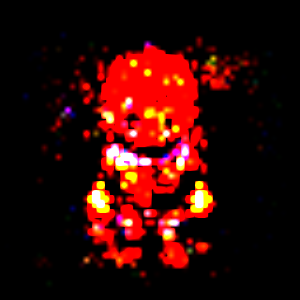

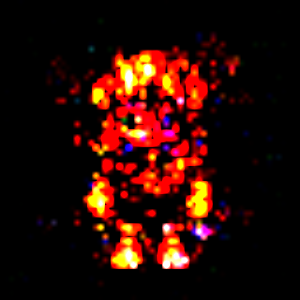



 =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 28, 31, 31]           1,372
       BatchNorm2d-2           [-1, 28, 31, 31]              56
            Conv2d-3           [-1, 64, 29, 29]          16,192
            Conv2d-4          [-1, 128, 14, 14]          73,856
       BatchNorm2d-5          [-1, 128, 14, 14]             256
            Conv2d-6          [-1, 256, 12, 12]         295,168
       BatchNorm2d-7          [-1, 256, 12, 12]             512
            Conv2d-8            [-1, 412, 3, 3]       3,797,404
            Linear-9                   [-1, 60]         222,540
           Linear-10                   [-1, 30]           1,830
           Linear-11                   [-1, 30]           1,830
           Linear-12                 [-1, 3708]         114,948
  ConvTranspose2d-13          [-1, 256, 10, 10]      


  0%|          | 0/200 [00:00<?, ?it/s]

VAE_(
  (batch_norm1): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm1_decode): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2_decode): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm3_decode): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout2d(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (cnn1): Conv2d(3, 28, kernel_size=(4, 4), stride=(2, 2))
  (cnn2): Conv2d(28, 64, kernel_size=(3, 3), stride=(1, 1))
  (cnn3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (cnn4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (cnn5): Conv2d(256, 412, kernel_size=(6, 6), stride=(


100%|██████████| 200/200 [05:52<00:00,  1.76s/it]

epoche: 0
original


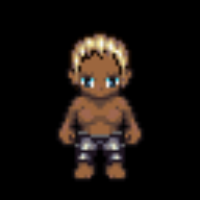

reconstructed


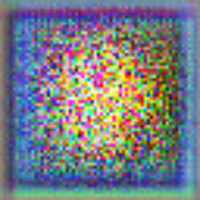

epoche: 100
original


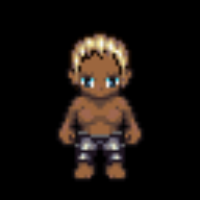

reconstructed


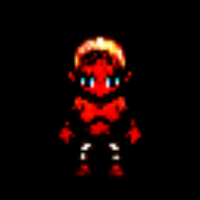

epoche: 199
original


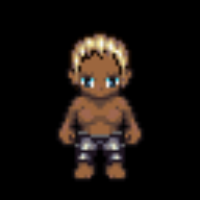

reconstructed


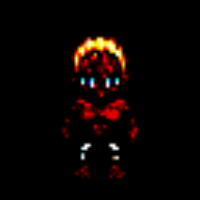

latent vector: tensor([-0.1969, -0.6619, -0.9871,  1.2454,  1.6563, -1.0565, -0.4373,  1.7931,
        -1.0806, -1.0512,  1.2163, -0.0817,  0.2677,  0.4154,  0.8868, -0.9755,
        -1.4662, -0.2693,  0.0480,  1.3810,  0.9419, -1.9772,  0.4246, -0.1062,
        -1.3812,  1.6271,  0.2607, -0.7682,  0.3051, -0.7459], device='cuda:0')
latent vector: tensor([ 0.0841, -2.3078,  0.3870,  1.3823, -0.0117,  0.0987, -0.7967, -1.3218,
         0.9612, -0.4633, -0.7594, -0.3799,  0.5771, -1.2819,  0.7743,  0.1331,
         0.9862, -0.5238,  0.0594, -0.9898,  0.3675,  0.3321, -1.0549, -0.4924,
        -0.9214, -0.3086,  0.2610,  0.2764, -0.0917, -0.3800], device='cuda:0')


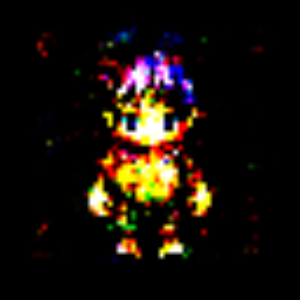

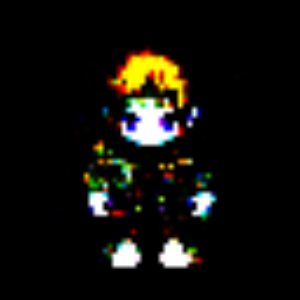

In [20]:
## Untersuchen des komplexesten VAE mit Conv Modells
# liefert die besten Ergebnisse, hat etwas größeren Latenten Raum und 
#nutzt zusätzlich noch Batchnormalization 
model = VAE_().to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'BCE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 30, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

print('\n')
print(65*'=')
print(15*' = ')
print(65*'=')
print('\n')

model = VAE_(sigmoid=True).to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'BCE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    #random.shuffle(tup_list)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 30, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

/content/AIPortfolio/VAEs/VAE_Trainer.py:119: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if augmented != '':

  0%|          | 0/200 [00:00<?, ?it/s]

linearVAE(
  (encoder): Sequential(
    (0): Linear(in_features=12288, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=250, bias=True)
    (3): ReLU()
    (4): Linear(in_features=250, out_features=75, bias=True)
    (5): ReLU()
    (6): Linear(in_features=75, out_features=60, bias=True)
    (7): ReLU()
  )
  (mean): Linear(in_features=60, out_features=30, bias=True)
  (var): Linear(in_features=60, out_features=30, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=30, out_features=60, bias=True)
    (1): ReLU()
    (2): Linear(in_features=60, out_features=75, bias=True)
    (3): ReLU()
    (4): Linear(in_features=75, out_features=250, bias=True)
    (5): ReLU()
    (6): Linear(in_features=250, out_features=1000, bias=True)
    (7): ReLU()
    (8): Linear(in_features=1000, out_features=12288, bias=True)
    (9): ReLU()
  )
)



100%|██████████| 200/200 [00:40<00:00,  4.89it/s]

epoche: 0
original


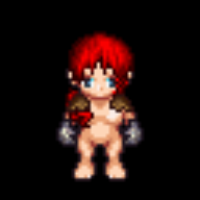

reconstructed


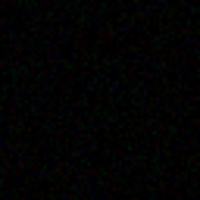

epoche: 100
original


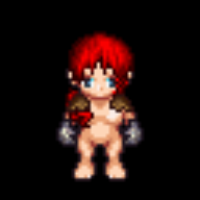

reconstructed


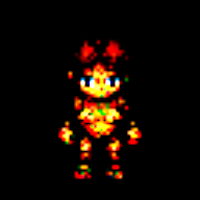

epoche: 199
original


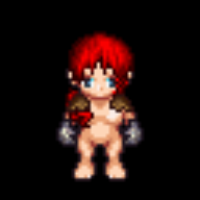

reconstructed


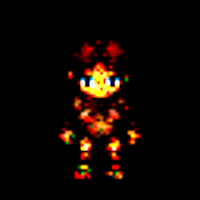

latent vector: tensor([[-0.2607, -0.6292,  0.9920, -0.1395, -0.1529,  0.6062, -0.3971, -0.4243,
          0.2993, -0.3854, -0.8725, -1.2791, -1.3521, -0.1273,  0.3813,  0.2558,
         -1.2851,  0.7596, -1.6047,  1.9564,  1.1448,  0.3637, -0.5239,  0.4715,
          0.1623,  1.5722, -1.5282,  0.2109, -0.2611, -0.2545]],
       device='cuda:0')
latent vector: tensor([[-0.5745,  2.5779, -0.4179, -0.1464,  0.2612,  0.5368,  0.5892,  1.0620,
         -0.6074,  0.9017, -0.4644,  0.9268, -1.1386,  0.8055, -0.0128,  0.5051,
         -0.2597, -0.3040, -0.4947,  0.4394,  1.0790, -1.1165, -0.2053,  0.5286,
         -1.1093, -0.9597, -0.2910,  1.6545,  0.8708,  0.4335]],
       device='cuda:0')


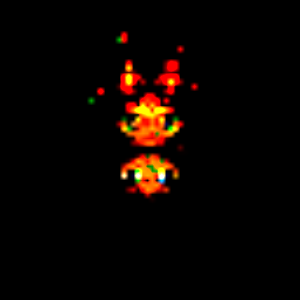

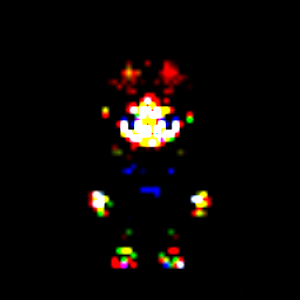



 =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 





  0%|          | 0/200 [00:00<?, ?it/s]

linearVAE(
  (encoder): Sequential(
    (0): Linear(in_features=12288, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=250, bias=True)
    (3): ReLU()
    (4): Linear(in_features=250, out_features=75, bias=True)
    (5): ReLU()
    (6): Linear(in_features=75, out_features=60, bias=True)
    (7): ReLU()
  )
  (mean): Linear(in_features=60, out_features=30, bias=True)
  (var): Linear(in_features=60, out_features=30, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=30, out_features=60, bias=True)
    (1): ReLU()
    (2): Linear(in_features=60, out_features=75, bias=True)
    (3): ReLU()
    (4): Linear(in_features=75, out_features=250, bias=True)
    (5): ReLU()
    (6): Linear(in_features=250, out_features=1000, bias=True)
    (7): ReLU()
    (8): Linear(in_features=1000, out_features=12288, bias=True)
    (9): Sigmoid()
  )
)



100%|██████████| 200/200 [00:40<00:00,  4.91it/s]

epoche: 0
original


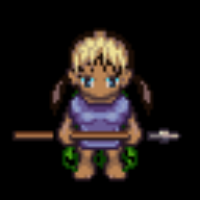

reconstructed


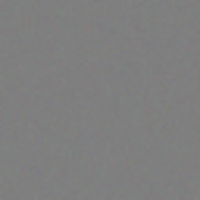

epoche: 100
original


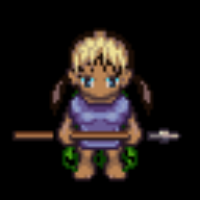

reconstructed


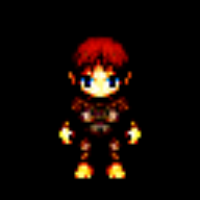

epoche: 199
original


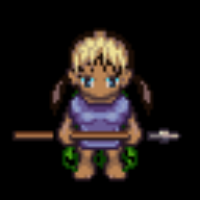

reconstructed


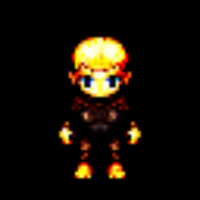

latent vector: tensor([[-0.1618,  0.7062,  0.3999,  0.0966,  0.2275, -0.1996, -1.2312,  0.9170,
         -0.2937, -0.7717,  0.6020, -0.5430,  0.8104, -1.0617, -2.0839,  0.8085,
         -0.4918, -0.3503, -0.5842, -1.1000, -0.2444, -0.3638, -1.5692, -0.9193,
         -1.2164,  0.8612, -0.4360,  0.6289,  0.1788, -0.4935]],
       device='cuda:0')
latent vector: tensor([[ 5.7385e-01, -4.8492e-01, -5.2013e-01,  1.9925e-01, -1.0008e-01,
         -1.0297e-02, -4.4492e-01, -1.5852e-03,  1.4540e+00,  5.3137e-01,
         -4.9387e-01, -1.8957e+00,  1.1652e+00, -1.0192e+00,  2.2641e-02,
         -1.2176e+00,  9.4480e-02, -2.4853e-01,  1.4217e+00,  3.0906e-01,
         -8.3818e-01,  4.3290e-02,  2.3578e-01,  4.0793e-01, -4.2444e-02,
         -7.6140e-04,  2.0410e-01,  2.4004e-01,  1.3210e-01, -2.9418e-01]],
       device='cuda:0')


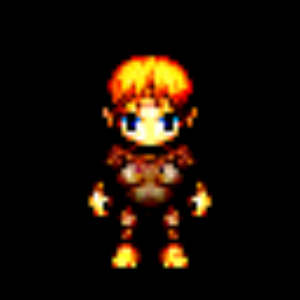

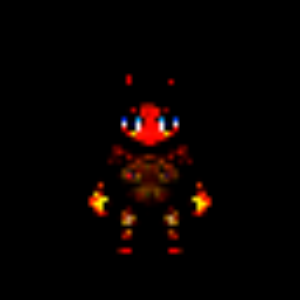

In [21]:
## Untersuchen des Modells mit nur linear layern
model = linearVAE().to(device)

#print(summary(model, input_size=(64*64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'BCE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    #random.shuffle(tup_list)
    for original, reconstructed in tup_list:

        or_ = original[0]
        or_ = or_.reshape(3,64,64)
        orig_ = cv2.resize(or_.cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons = reconstructed[0]
        recons = recons.reshape(3,64,64)
        recons_ = cv2.resize(recons.cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 30, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

print('\n')
print(65*'=')
print(15*' = ')
print(65*'=')
print('\n')

model = linearVAE(sigmoid = True).to(device)

#print(summary(model, input_size=(1,64*64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'BCE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    #random.shuffle(tup_list)
    for original, reconstructed in tup_list:
        or_ = original[0]
        or_ = or_.reshape(3,64,64)
        orig_ = cv2.resize(or_.cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons = reconstructed[0]
        recons = recons.reshape(3,64,64)
        recons_ = cv2.resize(recons.cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 30, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

### Untersuchung: MSE

/content/AIPortfolio/VAEs/VAE_Trainer.py:119: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if augmented != '':


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 31, 31]             588
              ReLU-2           [-1, 12, 31, 31]               0
            Linear-3                   [-1, 48]         553,584
            Linear-4                   [-1, 24]           1,176
            Linear-5                   [-1, 24]           1,176
            Linear-6                [-1, 11532]         288,300
   ConvTranspose2d-7            [-1, 3, 64, 64]             579
Total params: 845,403
Trainable params: 845,403
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.36
Params size (MB): 3.22
Estimated Total Size (MB): 3.63
----------------------------------------------------------------
None



  1%|          | 2/200 [00:00<00:14, 13.96it/s]

VAE_1Conv(
  (encoder): Sequential(
    (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
  )
  (encode): Linear(in_features=11532, out_features=48, bias=True)
  (decode): Linear(in_features=24, out_features=11532, bias=True)
  (decode_conv): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2))
  (mean): Linear(in_features=48, out_features=24, bias=True)
  (var): Linear(in_features=48, out_features=24, bias=True)
)



100%|██████████| 200/200 [00:15<00:00, 13.23it/s]

epoche: 0
original


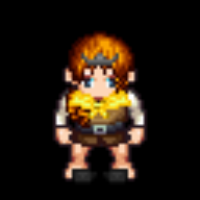

reconstructed


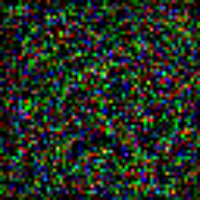

epoche: 100
original


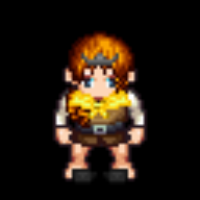

reconstructed


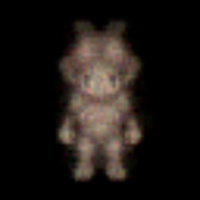

epoche: 199
original


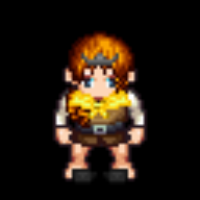

reconstructed


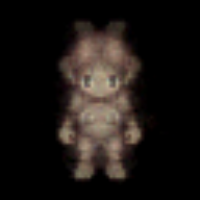

latent vector: tensor([[-1.6845, -0.3497, -0.1656,  0.3099, -0.6880,  0.2196, -0.0822,  0.4213,
          0.0099,  1.9398, -0.1634, -0.3854, -0.9490, -1.2552, -0.1917,  1.7662,
         -0.5617,  1.1580, -0.4397,  0.7003,  0.2096, -1.2508, -0.4850, -1.7235]],
       device='cuda:0')
latent vector: tensor([[ 0.9924, -1.1868, -0.9899,  0.1170,  1.6129, -0.3219, -1.5831,  0.3732,
          1.8583,  0.1046,  0.9975,  0.9677,  0.2364, -0.3657, -2.3160, -0.8444,
          0.0760,  1.7274, -0.7681,  1.0372,  0.6909, -0.1197,  1.4606,  1.2543]],
       device='cuda:0')


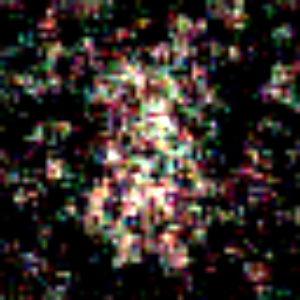

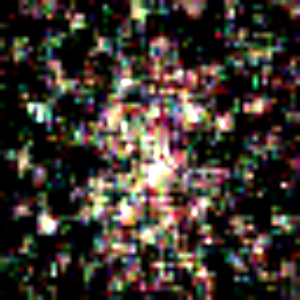

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")




 =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 31, 31]             588
              ReLU-2           [-1, 12, 31, 31]               0
            Linear-3                   [-1, 48]         553,584
            Linear-4                   [-1, 24]           1,176
            Linear-5                   [-1, 24]           1,176
            Linear-6                [-1, 11532]         288,300
   ConvTranspose2d-7            [-1, 3, 64, 64]             579
Total params: 845,403
Trainable params: 845,403
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.36
Params size (MB): 3.22
Estimated Total Size (MB): 3.63
----------------------------------------------------------------
None



  1%|          | 2/200 [00:00<00:14, 13.87it/s]

VAE_1Conv(
  (encoder): Sequential(
    (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
  )
  (encode): Linear(in_features=11532, out_features=48, bias=True)
  (decode): Linear(in_features=24, out_features=11532, bias=True)
  (decode_conv): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2))
  (mean): Linear(in_features=48, out_features=24, bias=True)
  (var): Linear(in_features=48, out_features=24, bias=True)
)



100%|██████████| 200/200 [00:15<00:00, 13.15it/s]

epoche: 0
original


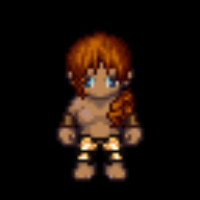

reconstructed


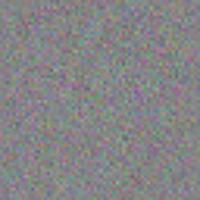

epoche: 100
original


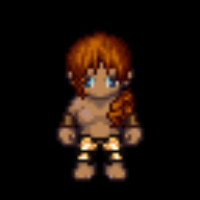

reconstructed


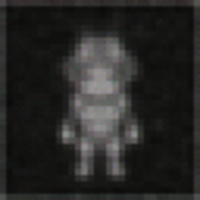

epoche: 199
original


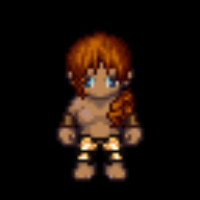

reconstructed


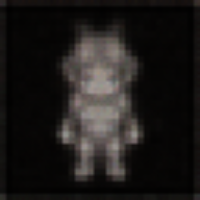

latent vector: tensor([[-1.2776,  1.0967,  1.2360, -0.6187, -0.7930, -1.4842, -0.0320,  0.2225,
         -0.5410, -2.1814,  0.5344, -1.1073, -0.4445, -1.0766, -0.2372,  0.8114,
         -0.5743, -0.3264, -0.6212, -0.1565, -1.4278, -0.3733, -0.7964, -0.6690]],
       device='cuda:0')
latent vector: tensor([[ 0.7629, -0.7857,  0.1551,  2.0589,  1.9992,  0.9162, -2.2445,  1.5448,
          0.0883, -1.6421, -0.7090,  0.2566, -0.1448, -2.2054,  0.5284,  0.1922,
         -1.0143,  0.2791, -0.4272,  0.0702,  0.1829,  2.4400,  0.5813, -0.6222]],
       device='cuda:0')


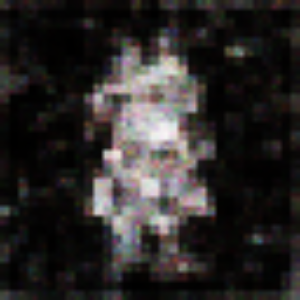

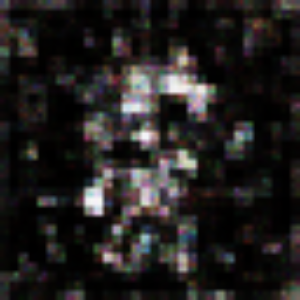

In [22]:
## Untersuchen des Modells mit einem Conv und MSE Loss
model = VAE_1Conv().to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'MSE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    #random.shuffle(tup_list)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 24, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

print('\n')
print(65*'=')
print(15*' = ')
print(65*'=')
print('\n')

model = VAE_1Conv(sigmoid=True).to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'MSE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    #random.shuffle(tup_list)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 24, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 31, 31]             588
              ReLU-2           [-1, 12, 31, 31]               0
            Conv2d-3           [-1, 48, 15, 15]           5,232
              ReLU-4           [-1, 48, 15, 15]               0
            Linear-5                   [-1, 48]         518,448
            Linear-6                   [-1, 24]           1,176
            Linear-7                   [-1, 24]           1,176
            Linear-8                [-1, 10800]         270,000
   ConvTranspose2d-9           [-1, 12, 31, 31]           5,196
             ReLU-10           [-1, 12, 31, 31]               0
  ConvTranspose2d-11            [-1, 3, 64, 64]             579
Total params: 802,395
Trainable params: 802,395
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/

/content/AIPortfolio/VAEs/VAE_Trainer.py:119: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if augmented != '':

  1%|          | 2/200 [00:00<00:18, 10.61it/s]

VAE_2Conv(
  (encoder): Sequential(
    (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(12, 48, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
  )
  (encode): Linear(in_features=10800, out_features=48, bias=True)
  (decode): Linear(in_features=24, out_features=10800, bias=True)
  (decode_conv): Sequential(
    (0): ConvTranspose2d(48, 12, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2))
  )
  (mean): Linear(in_features=48, out_features=24, bias=True)
  (var): Linear(in_features=48, out_features=24, bias=True)
)



100%|██████████| 200/200 [00:18<00:00, 10.82it/s]


epoche: 0
original


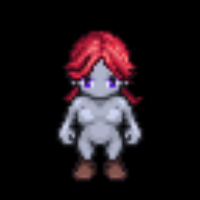

reconstructed


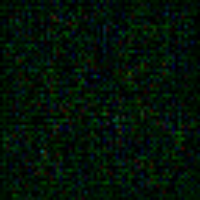

epoche: 100
original


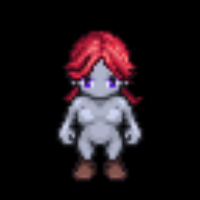

reconstructed


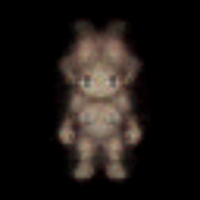

epoche: 199
original


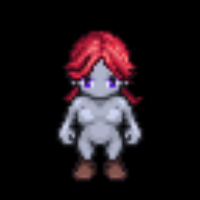

reconstructed


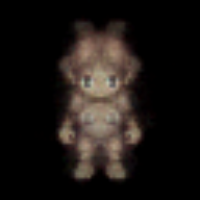

latent vector: tensor([[ 0.7290, -1.8346,  1.8682,  0.1060,  0.1159, -1.0471,  0.4210, -0.1849,
          0.4156,  0.8902, -0.5243, -0.7317,  0.8618, -1.0386,  0.5400, -1.2475,
         -1.2469,  1.7427,  0.1136, -1.0507, -1.1841,  1.0360,  0.4137, -0.5132]],
       device='cuda:0')
latent vector: tensor([[-0.3198,  0.4895,  0.2034, -0.5237, -0.5015,  0.6324,  0.7061,  0.4530,
         -0.4818,  0.6602, -0.2012, -1.8542, -0.7026, -0.6789, -0.3072, -0.8620,
          1.3212,  0.6737,  1.2980,  0.7785,  0.1050, -0.7173,  0.5680, -1.0147]],
       device='cuda:0')


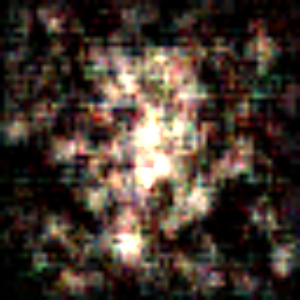

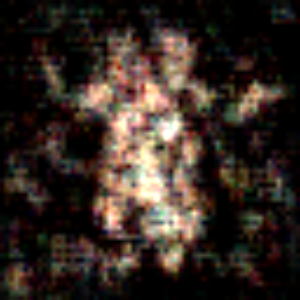

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")




 =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 31, 31]             588
              ReLU-2           [-1, 12, 31, 31]               0
            Conv2d-3           [-1, 48, 15, 15]           5,232
              ReLU-4           [-1, 48, 15, 15]               0
            Linear-5                   [-1, 48]         518,448
            Linear-6                   [-1, 24]           1,176
            Linear-7                   [-1, 24]           1,176
            Linear-8                [-1, 10800]         270,000
   ConvTranspose2d-9           [-1, 12, 31, 31]           5,196
             ReLU-10           [-1, 12, 31, 31]               0
  ConvTranspose2d-11            [-1, 3, 64, 64]             579
Total params: 802,395
Trainable params: 802,395
Non-trainable params: 0
---------------------------------------------


  0%|          | 1/200 [00:00<00:21,  9.45it/s]

VAE_2Conv(
  (encoder): Sequential(
    (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(12, 48, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
  )
  (encode): Linear(in_features=10800, out_features=48, bias=True)
  (decode): Linear(in_features=24, out_features=10800, bias=True)
  (decode_conv): Sequential(
    (0): ConvTranspose2d(48, 12, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2))
  )
  (mean): Linear(in_features=48, out_features=24, bias=True)
  (var): Linear(in_features=48, out_features=24, bias=True)
)



100%|██████████| 200/200 [00:20<00:00,  9.79it/s]

epoche: 0
original


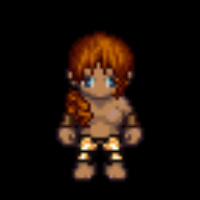

reconstructed


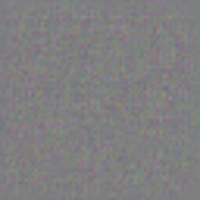

epoche: 100
original


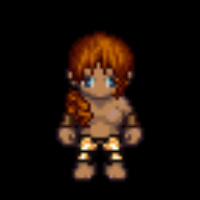

reconstructed


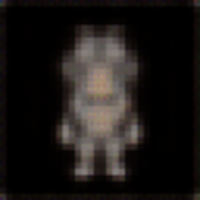

epoche: 199
original


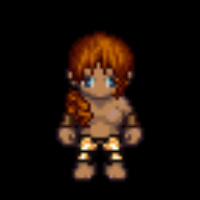

reconstructed


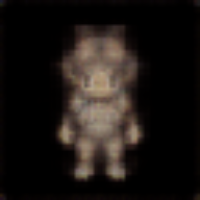

latent vector: tensor([[ 1.2181e+00, -1.6760e+00,  1.2041e+00,  3.1501e-01, -4.8748e-02,
         -1.2561e+00,  8.7973e-01, -1.3681e+00,  1.5729e-04,  2.0036e+00,
         -4.9423e-01, -2.6743e-01,  1.6947e+00,  3.1943e-01,  3.5145e-01,
         -1.6067e-01,  8.2535e-01,  2.6250e-01,  9.1126e-01,  2.9768e-01,
          9.5936e-01, -1.2733e+00,  3.8382e-01,  1.0976e-01]], device='cuda:0')
latent vector: tensor([[-1.4036,  1.6758, -0.4474, -0.6883, -1.3118, -0.6211,  1.7108,  0.1204,
          0.5106,  0.7753,  0.7001,  0.2904, -0.9366, -1.1519, -0.4833,  0.8059,
         -0.8695, -0.6070, -0.7838, -0.5635,  1.9864, -2.0070,  0.2866,  0.3754]],
       device='cuda:0')


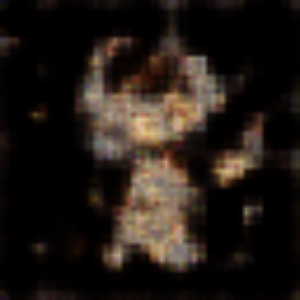

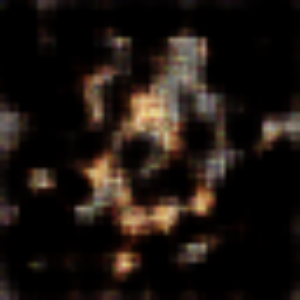

In [23]:
## Untersuchen des Modells mit zwei Conv und MSE Loss
model = VAE_2Conv().to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'MSE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 24, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

print('\n')
print(65*'=')
print(15*' = ')
print(65*'=')
print('\n')

model = VAE_2Conv(sigmoid=True).to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'MSE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 24, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 31, 31]             588
              ReLU-2           [-1, 12, 31, 31]               0
            Conv2d-3           [-1, 48, 15, 15]           5,232
              ReLU-4           [-1, 48, 15, 15]               0
            Conv2d-5           [-1, 64, 13, 13]          27,712
              ReLU-6           [-1, 64, 13, 13]               0
            Linear-7                   [-1, 48]         519,216
            Linear-8                   [-1, 24]           1,176
            Linear-9                   [-1, 24]           1,176
           Linear-10                [-1, 10816]         270,400
  ConvTranspose2d-11           [-1, 48, 15, 15]          27,696
             ReLU-12           [-1, 48, 15, 15]               0
  ConvTranspose2d-13           [-1, 12, 31, 31]           5,196
             ReLU-14           [-1, 12,

/content/AIPortfolio/VAEs/VAE_Trainer.py:119: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if augmented != '':

  0%|          | 1/200 [00:00<00:23,  8.43it/s]

VAE_3Conv(
  (encoder): Sequential(
    (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(12, 48, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (encode): Linear(in_features=10816, out_features=48, bias=True)
  (decode): Linear(in_features=24, out_features=10816, bias=True)
  (decode_conv): Sequential(
    (0): ConvTranspose2d(64, 48, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(48, 12, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2))
  )
  (mean): Linear(in_features=48, out_features=24, bias=True)
  (var): Linear(in_features=48, out_features=24, bias=True)
)



100%|██████████| 200/200 [00:23<00:00,  8.53it/s]

epoche: 0
original


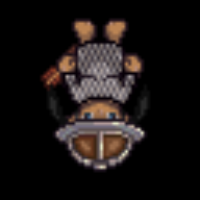

reconstructed


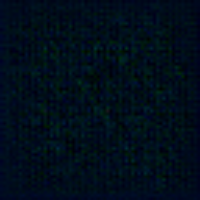

epoche: 100
original


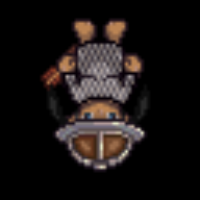

reconstructed


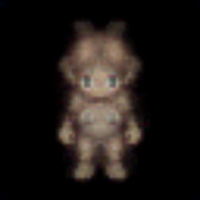

epoche: 199
original


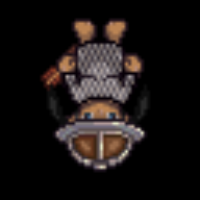

reconstructed


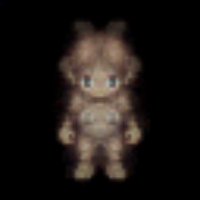

latent vector: tensor([[ 0.7948,  0.9028, -1.3712, -1.1190,  0.6571,  0.0105, -0.6131, -0.3961,
         -0.4227, -2.0291, -2.3648,  1.3913, -1.3103,  0.4607,  0.0778, -0.6482,
         -0.2471,  0.5704,  1.6929,  2.2828,  2.1442,  0.1956, -0.4009,  1.2231]],
       device='cuda:0')
latent vector: tensor([[ 0.6061,  1.4215, -0.6671, -0.6893,  0.3764,  0.0337,  0.2092,  0.8701,
         -0.1255,  0.3138,  1.4245,  0.1783,  0.8558, -0.2569, -0.3147, -0.8757,
          0.5005,  0.3061, -0.7830, -0.3546,  0.3712, -1.0408,  0.4255,  0.4099]],
       device='cuda:0')


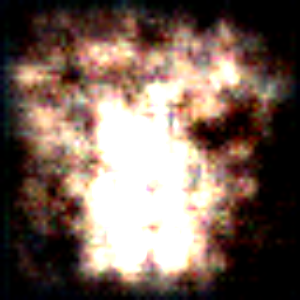

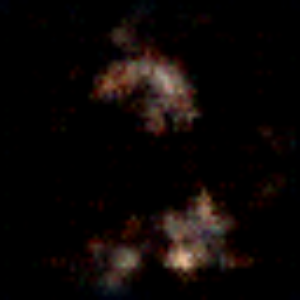

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")




 =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 31, 31]             588
              ReLU-2           [-1, 12, 31, 31]               0
            Conv2d-3           [-1, 48, 15, 15]           5,232
              ReLU-4           [-1, 48, 15, 15]               0
            Conv2d-5           [-1, 64, 13, 13]          27,712
              ReLU-6           [-1, 64, 13, 13]               0
            Linear-7                   [-1, 48]         519,216
            Linear-8                   [-1, 24]           1,176
            Linear-9                   [-1, 24]           1,176
           Linear-10                [-1, 10816]         270,400
  ConvTranspose2d-11           [-1, 48, 15, 15]          27,696
             ReLU-12           [-1, 48, 15, 15]               0
  ConvTranspose2d-13           [-1, 12, 31, 31]      


  0%|          | 1/200 [00:00<00:22,  9.01it/s]

VAE_3Conv(
  (encoder): Sequential(
    (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(12, 48, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (encode): Linear(in_features=10816, out_features=48, bias=True)
  (decode): Linear(in_features=24, out_features=10816, bias=True)
  (decode_conv): Sequential(
    (0): ConvTranspose2d(64, 48, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(48, 12, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2))
  )
  (mean): Linear(in_features=48, out_features=24, bias=True)
  (var): Linear(in_features=48, out_features=24, bias=True)
)



100%|██████████| 200/200 [00:23<00:00,  8.45it/s]

epoche: 0
original


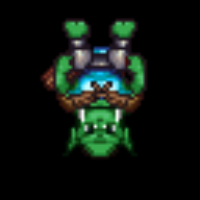

reconstructed


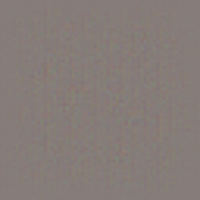

epoche: 100
original


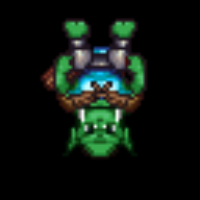

reconstructed


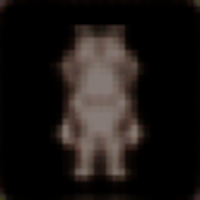

epoche: 199
original


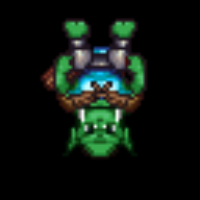

reconstructed


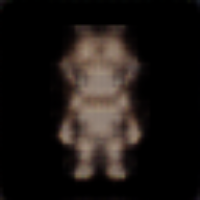

latent vector: tensor([[ 0.9127,  0.2683, -0.3478,  0.3564,  0.7301,  1.8031, -0.5375, -1.9929,
         -0.8453,  0.0481,  0.8563, -1.4569,  0.5358, -0.1005,  0.2068,  2.5316,
          0.3115,  0.9348, -0.0254,  0.6241,  0.9956, -0.4285, -0.3486, -0.0880]],
       device='cuda:0')
latent vector: tensor([[ 0.1755, -0.2687, -1.0411, -1.1744, -0.5648, -0.5834, -0.4609,  1.4238,
         -1.0996, -0.1918, -1.0155, -0.9462,  0.2927,  2.7305,  0.8074,  0.9338,
          1.7110, -0.4053, -1.2709, -0.1567, -0.5236,  2.1324, -0.2522,  1.1139]],
       device='cuda:0')


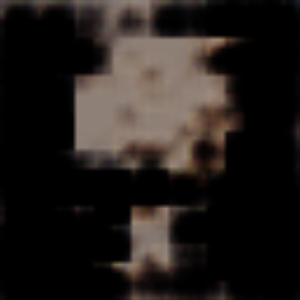

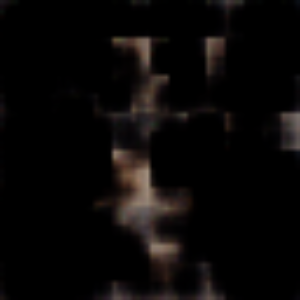

In [24]:
## Untersuchen des Modells mit drei Conv und MSE Loss
model = VAE_3Conv().to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'MSE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)
                        
for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    #random.shuffle(tup_list)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 24, color=True, norm = True)

for img in generated_images:
    cv2_imshow(img)

print('\n')
print(65*'=')
print(15*' = ')
print(65*'=')
print('\n')

model = VAE_3Conv(sigmoid=True).to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'MSE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    #random.shuffle(tup_list)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 24, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 28, 31, 31]           1,372
       BatchNorm2d-2           [-1, 28, 31, 31]              56
            Conv2d-3           [-1, 64, 29, 29]          16,192
            Conv2d-4          [-1, 128, 14, 14]          73,856
       BatchNorm2d-5          [-1, 128, 14, 14]             256
            Conv2d-6          [-1, 256, 12, 12]         295,168
       BatchNorm2d-7          [-1, 256, 12, 12]             512
            Conv2d-8            [-1, 412, 3, 3]       3,797,404
            Linear-9                   [-1, 60]         222,540
           Linear-10                   [-1, 30]           1,830
           Linear-11                   [-1, 30]           1,830
           Linear-12                 [-1, 3708]         114,948
  ConvTranspose2d-13          [-1, 256, 10, 10]       3,797,248
      BatchNorm2d-14          [-1, 256,

/content/AIPortfolio/VAEs/VAE_Trainer.py:119: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if augmented != '':

  0%|          | 0/200 [00:00<?, ?it/s]

VAE_(
  (batch_norm1): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm1_decode): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2_decode): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm3_decode): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout2d(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (cnn1): Conv2d(3, 28, kernel_size=(4, 4), stride=(2, 2))
  (cnn2): Conv2d(28, 64, kernel_size=(3, 3), stride=(1, 1))
  (cnn3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (cnn4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (cnn5): Conv2d(256, 412, kernel_size=(6, 6), stride=(


100%|██████████| 200/200 [05:54<00:00,  1.77s/it]

epoche: 0
original


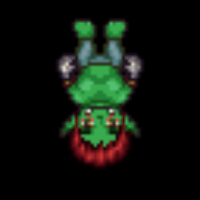

reconstructed


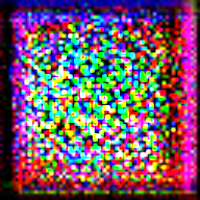

epoche: 100
original


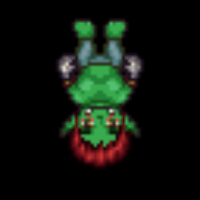

reconstructed


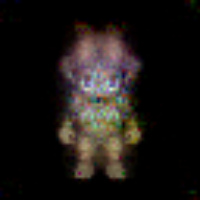

epoche: 199
original


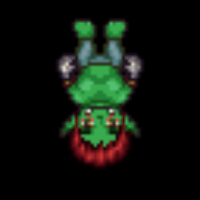

reconstructed


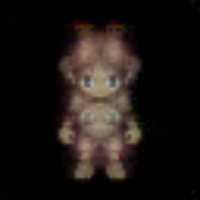

latent vector: tensor([ 1.8624, -1.9008, -1.0482, -0.4170,  0.0905, -0.3526, -0.8426, -0.7622,
        -1.3291,  2.6473, -0.7596,  2.3736,  0.6757, -1.4693, -0.4220, -0.2196,
        -0.7785,  0.7368, -0.5737, -0.2351, -1.1531, -1.3287, -0.4557,  0.1151,
         1.2475,  0.1105,  0.5754,  0.0698, -0.0335, -0.1814], device='cuda:0')
latent vector: tensor([-0.2778,  2.2130, -0.3710,  1.6323, -0.0635,  0.2458,  1.7849, -1.6123,
         0.1925, -0.8610,  0.3782,  1.2013,  1.6296, -0.9214, -0.0936,  0.6021,
         0.3921,  2.4333, -0.3922,  1.6639, -1.0057, -2.2857, -0.7100,  0.5284,
         1.8418,  1.9808, -0.4370, -1.3409, -0.2649, -0.6246], device='cuda:0')


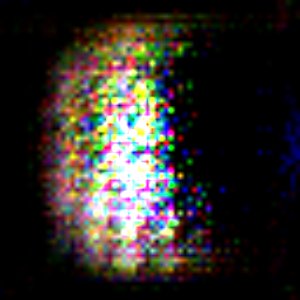

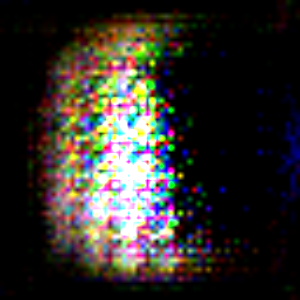



 =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 28, 31, 31]           1,372
       BatchNorm2d-2           [-1, 28, 31, 31]              56
            Conv2d-3           [-1, 64, 29, 29]          16,192
            Conv2d-4          [-1, 128, 14, 14]          73,856
       BatchNorm2d-5          [-1, 128, 14, 14]             256
            Conv2d-6          [-1, 256, 12, 12]         295,168
       BatchNorm2d-7          [-1, 256, 12, 12]             512
            Conv2d-8            [-1, 412, 3, 3]       3,797,404
            Linear-9                   [-1, 60]         222,540
           Linear-10                   [-1, 30]           1,830
           Linear-11                   [-1, 30]           1,830
           Linear-12                 [-1, 3708]         114,948
  ConvTranspose2d-13          [-1, 256, 10, 10]      


  0%|          | 0/200 [00:00<?, ?it/s]

VAE_(
  (batch_norm1): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm1_decode): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2_decode): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm3_decode): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout2d(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (cnn1): Conv2d(3, 28, kernel_size=(4, 4), stride=(2, 2))
  (cnn2): Conv2d(28, 64, kernel_size=(3, 3), stride=(1, 1))
  (cnn3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (cnn4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (cnn5): Conv2d(256, 412, kernel_size=(6, 6), stride=(


100%|██████████| 200/200 [05:50<00:00,  1.75s/it]

epoche: 0
original


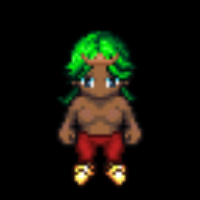

reconstructed


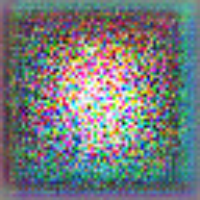

epoche: 100
original


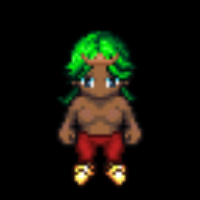

reconstructed


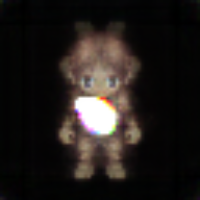

epoche: 199
original


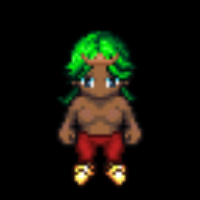

reconstructed


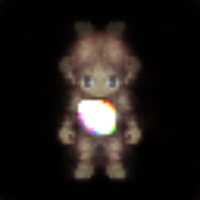

latent vector: tensor([-0.4618,  0.7837,  0.9270, -0.4877, -0.6171, -0.8641,  0.9100, -0.1275,
        -2.3290,  0.2332, -0.6051, -1.0611, -1.4280,  0.8834, -0.7481, -1.3327,
         0.1829,  0.4169, -0.3674, -0.6881,  0.3810,  0.9462, -0.0706, -2.4722,
         0.6700, -0.0153, -1.3234, -0.3231,  1.1977,  0.2489], device='cuda:0')
latent vector: tensor([ 0.1739,  0.8720, -0.9494,  0.0541, -1.2696,  1.0047, -2.0814,  1.6341,
        -1.1981, -0.3100, -0.3646, -2.1885, -1.0376, -0.5837,  0.7929, -0.4518,
         1.4576, -0.6285,  0.5487, -1.5511,  1.7144, -0.4123, -1.1285,  0.4204,
         0.0879,  1.0379, -0.2963,  1.1179,  0.0861,  1.1267], device='cuda:0')


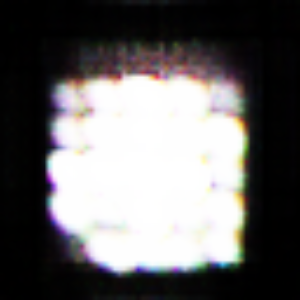

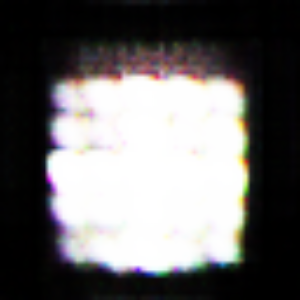

In [25]:
## Untersuchen des komplexesten VAE mit Conv Modells
# liefert die besten Ergebnisse, hat etwas größeren Latenten Raum und 
#nutzt zusätzlich noch Batchnormalization 
model = VAE_().to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'MSE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    #random.shuffle(tup_list)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 30, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

print('\n')
print(65*'=')
print(15*' = ')
print(65*'=')
print('\n')

model = VAE_(sigmoid=True).to(device)

print(summary(model, input_size=(3,64,64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'MSE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    #random.shuffle(tup_list)
    for original, reconstructed in tup_list:

        orig_ = cv2.resize(original[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons_ = cv2.resize(reconstructed[0].cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 30, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

/content/AIPortfolio/VAEs/VAE_Trainer.py:119: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if augmented != '':

  0%|          | 1/200 [00:00<00:36,  5.38it/s]

linearVAE(
  (encoder): Sequential(
    (0): Linear(in_features=12288, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=250, bias=True)
    (3): ReLU()
    (4): Linear(in_features=250, out_features=75, bias=True)
    (5): ReLU()
    (6): Linear(in_features=75, out_features=60, bias=True)
    (7): ReLU()
  )
  (mean): Linear(in_features=60, out_features=30, bias=True)
  (var): Linear(in_features=60, out_features=30, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=30, out_features=60, bias=True)
    (1): ReLU()
    (2): Linear(in_features=60, out_features=75, bias=True)
    (3): ReLU()
    (4): Linear(in_features=75, out_features=250, bias=True)
    (5): ReLU()
    (6): Linear(in_features=250, out_features=1000, bias=True)
    (7): ReLU()
    (8): Linear(in_features=1000, out_features=12288, bias=True)
    (9): ReLU()
  )
)



100%|██████████| 200/200 [00:38<00:00,  5.20it/s]


epoche: 0
original


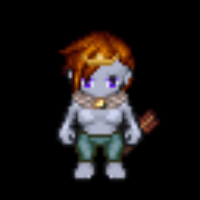

reconstructed


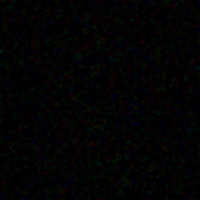

epoche: 100
original


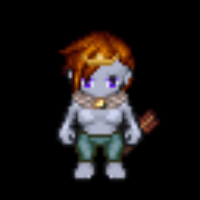

reconstructed


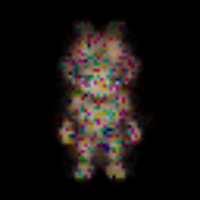

epoche: 199
original


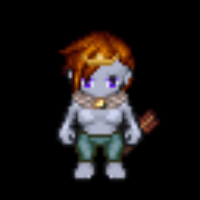

reconstructed


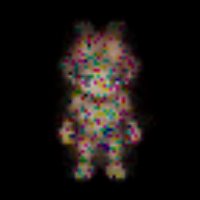

latent vector: tensor([[ 2.0145, -1.8613,  1.4279,  0.3490,  1.1313,  0.0622, -0.7091,  1.5329,
          0.3338, -1.2892, -2.1630,  0.9265, -0.3031, -0.7780, -1.0321, -0.8980,
          0.6822,  0.3416,  0.5667, -0.1381, -1.1731,  0.2297,  0.3389,  1.5983,
         -1.8806, -0.0415,  0.2729, -0.2042, -0.2777,  1.4196]],
       device='cuda:0')
latent vector: tensor([[-0.5451, -0.3402,  1.9674,  1.4296,  1.6389,  0.4292, -0.5951,  0.6024,
         -1.5000, -0.8233,  0.5435,  0.0046,  1.8709, -0.7196,  1.5517, -0.4203,
         -0.3220, -1.0712,  0.9860,  1.2688, -0.2478, -1.9307, -0.5884,  0.9992,
         -0.5152, -0.6139, -0.1969,  0.8195,  0.7959, -0.5253]],
       device='cuda:0')


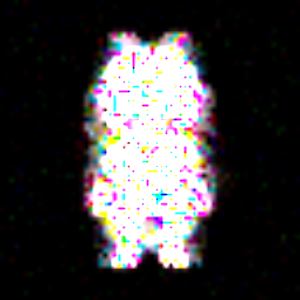

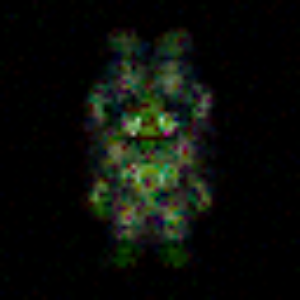



 =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 





  0%|          | 1/200 [00:00<00:37,  5.37it/s]

linearVAE(
  (encoder): Sequential(
    (0): Linear(in_features=12288, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=250, bias=True)
    (3): ReLU()
    (4): Linear(in_features=250, out_features=75, bias=True)
    (5): ReLU()
    (6): Linear(in_features=75, out_features=60, bias=True)
    (7): ReLU()
  )
  (mean): Linear(in_features=60, out_features=30, bias=True)
  (var): Linear(in_features=60, out_features=30, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=30, out_features=60, bias=True)
    (1): ReLU()
    (2): Linear(in_features=60, out_features=75, bias=True)
    (3): ReLU()
    (4): Linear(in_features=75, out_features=250, bias=True)
    (5): ReLU()
    (6): Linear(in_features=250, out_features=1000, bias=True)
    (7): ReLU()
    (8): Linear(in_features=1000, out_features=12288, bias=True)
    (9): Sigmoid()
  )
)



100%|██████████| 200/200 [00:38<00:00,  5.21it/s]


epoche: 0
original


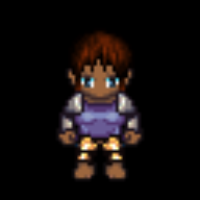

reconstructed


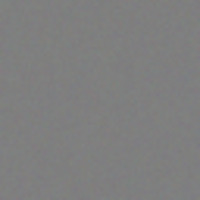

epoche: 100
original


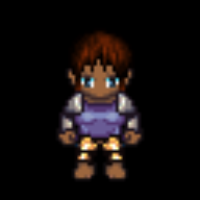

reconstructed


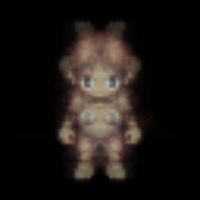

epoche: 199
original


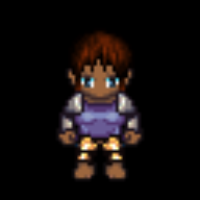

reconstructed


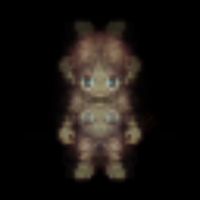

latent vector: tensor([[ 0.2734, -0.1563, -0.3323, -1.3803,  0.0198, -0.2941,  1.4583, -0.1289,
          1.9591,  0.5328,  1.4869,  0.8346,  0.3296, -0.1218, -0.0911, -1.5091,
         -1.0698, -1.3250, -0.4008, -1.3454, -1.7156,  2.3245,  1.5587, -0.5836,
          0.9664, -0.8285, -0.2260,  0.0588, -0.4339,  1.9579]],
       device='cuda:0')
latent vector: tensor([[ 0.1449, -0.4507, -0.3219,  0.6080, -2.1118, -0.8126, -0.2786,  1.7952,
          1.2369, -0.4867,  1.9483, -0.1445, -0.7625,  0.9739,  0.2738,  0.2783,
          1.9881, -1.2170, -0.9286,  0.4829, -0.6428, -1.6747, -1.1728, -1.7607,
          1.0871,  2.4656, -0.2894,  1.1864, -0.4087, -2.4550]],
       device='cuda:0')


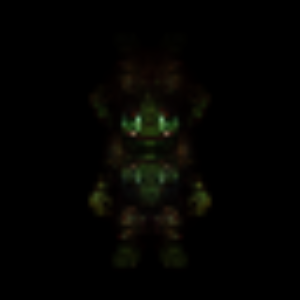

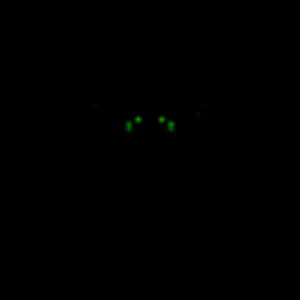

In [26]:
## Untersuchen des linear Modells mit einem Conv und MSE Loss
model = linearVAE().to(device)

#print(summary(model, input_size=(64*64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'MSE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    for original, reconstructed in tup_list:

        or_ = original[0]
        or_ = or_.reshape(3,64,64)
        orig_ = cv2.resize(or_.cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons = reconstructed[0]
        recons = recons.reshape(3,64,64)
        recons_ = cv2.resize(recons.cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 30, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)

print('\n')
print(65*'=')
print(15*' = ')
print(65*'=')
print('\n')

model = linearVAE(sigmoid = True).to(device)

#print(summary(model, input_size=(1,64*64)))

VAE = VAE_TrainPipeline(path, lr=lr, num_epochs = train_epochs, loss_func = 'MSE', pretrained = False, use_augmentation=True)
model = VAE.train_model(model)

for epoche, tup_list in VAE.reconstruction.items():
    if not epoche % 100 == 0 and epoche+1 != train_epochs:
        continue
    print('epoche:', epoche)
    for original, reconstructed in tup_list:
        or_ = original[0]
        or_ = or_.reshape(3,64,64)
        orig_ = cv2.resize(or_.cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        recons = reconstructed[0]
        recons = recons.reshape(3,64,64)
        recons_ = cv2.resize(recons.cpu().permute(1,2,0).detach().numpy()*255, (200,200))
        print('original')
        cv2_imshow(orig_)
        print('reconstructed')
        cv2_imshow(recons_)
        break

generated_images = VAE.generate_random_images(2, emb_size = 30, color=True, norm = True)
for img in generated_images:
    cv2_imshow(img)